# Parte I: Búsqueda y Análisis de Conjuntos de Datos

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install lightgbm optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.9/246.9 kB 12.4 MB/s eta 0:00:00


## 1. Búsqueda de Conjuntos de Datos:
Buscar al menos cuatro conjuntos de datos en plataformas como Kaggle, UCI Machine Learning Repository o cualquier otra fuente confiable.
Asegurarse de que los conjuntos de datos seleccionados sean diversos y cubran diferentes dominios y tipos de datos.


## 2.Análisis Exploratorio de Datos (EDA) Inicial:

### Data Set N°1 : Pingüinos

In [2]:
import seaborn as sns

In [3]:
df_pg = sns.load_dataset("penguins")

#### Análisis Exploratorio de Datos (EDA) Inicial:

In [4]:
df_pg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
df_pg[df_pg["sex"].isna()]
df_pg[df_pg["species"].isna()]
df_pg[df_pg["island"].isna()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex


In [6]:
df_pg.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [7]:
df_pg[df_pg["sex"].isna()]

df_pg.groupby(["species", "island"])["sex"].value_counts()

#Especie  Adelie Isla Dream  hay más Male asíque completaré los Nan con Male
#Especie  Gentoo Isla Biscoe  hay más Male asíque completaré los Nan con Male
df_pg.loc[(df_pg["island"].isin(["Dream", "Biscoe"])) & (df_pg["sex"].isna()),"sex"] = "Male"

#Especie  Adelie Isla Torgersen hay más Female asíque completaré los Nan con Female
df_pg.loc[(df_pg["species"].isin(["Adelie"])) & (df_pg["island"].isin(["Torgersen"])) &  (df_pg["sex"].isna()), "sex"] = "Female"


df_pg["sex"].value_counts()
df_pg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [8]:
df_pg[ df_pg["bill_length_mm"].isna() &    df_pg["bill_depth_mm"].isna() &    df_pg["flipper_length_mm"].isna() &    df_pg["body_mass_g"].isna()].shape

(2, 7)

In [9]:
df_pg = df_pg.drop( df_pg[df_pg["bill_length_mm"].isna() & df_pg["bill_depth_mm"].isna() & df_pg["flipper_length_mm"].isna() & df_pg["body_mass_g"].isna() ].index)

In [10]:
df_pg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                342 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


In [11]:
df_pg.describe().T

,count,mean,std,min,25%,50%,75%,max
bill_length_mm,342.0,43.921930,5.459584,32.1,39.225,44.45,48.5,59.6
bill_depth_mm,342.0,17.151170,1.974793,13.1,15.600,17.30,18.7,21.5
flipper_length_mm,342.0,200.915205,14.061714,172.0,190.000,197.00,213.0,231.0
body_mass_g,342.0,4201.754386,801.954536,2700.0,3550.000,4050.00,4750.0,6300.0


In [12]:
df_pg.duplicated().sum()

np.int64(0)

##### Visualizaciones

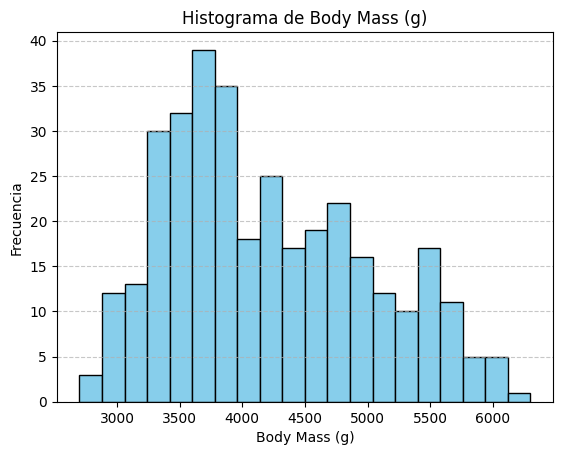

In [13]:
df_pg['body_mass_g'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')

plt.title('Histograma de Body Mass (g)')
plt.xlabel('Body Mass (g)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

La mayoría de los pingüinos pesan entre 3.500 y 4.000 gramos.

Es útil para ver la concentración de datos y detectar posibles outliers o múltiples grupos.

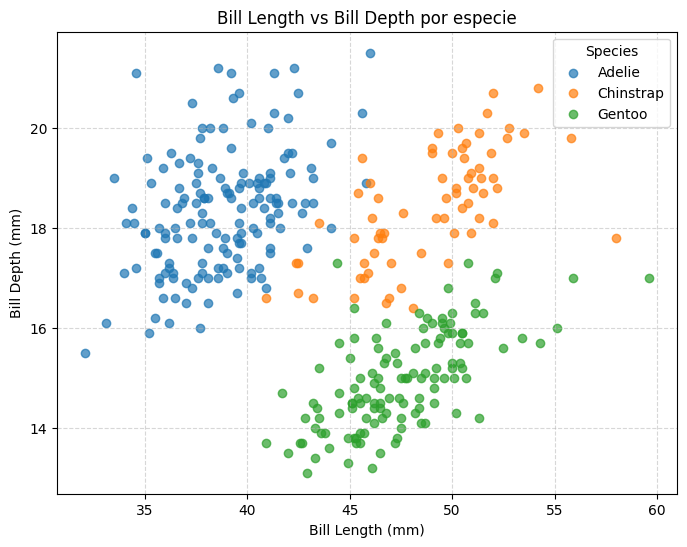

In [14]:
species = df_pg['species'].unique()

fig, ax = plt.subplots(figsize=(8, 6))

for specie in species:
    subset = df_pg[df_pg['species'] == specie]
    ax.scatter(subset['bill_length_mm'], subset['bill_depth_mm'],
               label=specie, alpha=0.7)

ax.set_title('Bill Length vs Bill Depth por especie')
ax.set_xlabel('Bill Length (mm)')
ax.set_ylabel('Bill Depth (mm)')
ax.legend(title='Species')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

Se observa una separación clara entre especies:
Adelie: más concentrados en longitudes de pico menores y profundidades mayores.
Chinstrap: valores intermedios.
Gentoo: picos más largos y profundidades menores.

Esta visualización muestra bien cómo se agrupan las especies y sugiere que estas variables son buenas para clasificarlas.

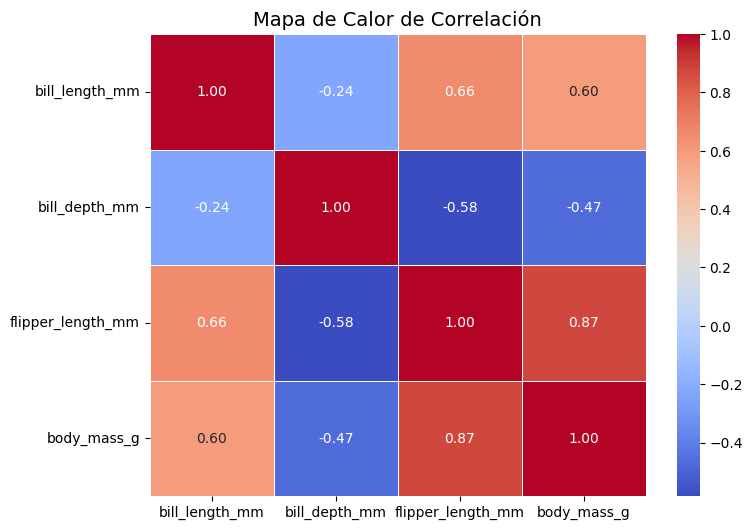

In [15]:
corr = df_pg.corr(numeric_only=True)
plt.figure(figsize=(8, 6))
plt.title('Mapa de Calor de Correlación', fontsize=14)

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.show()

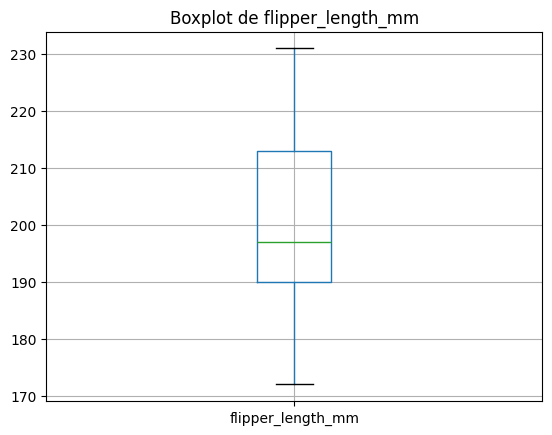

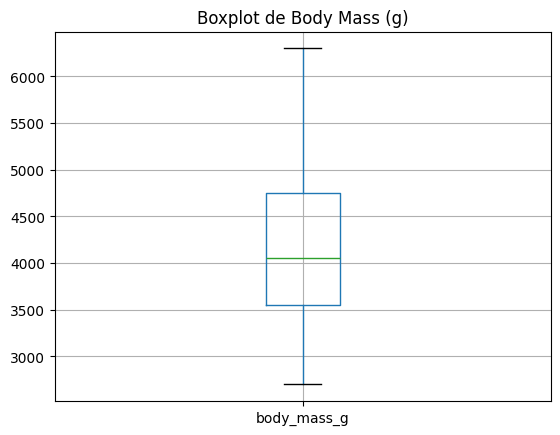

In [16]:
df_pg.boxplot(column='flipper_length_mm')
plt.title('Boxplot de flipper_length_mm')
plt.show()

df_pg.boxplot(column='body_mass_g')
plt.title('Boxplot de Body Mass (g)')
plt.show()

## 3. Diagnóstico y Selección de Problema:

Dataset N°1 : Pingüinos ---> target: species (categoria)  ---> clasificador  


Para este dataset escogí un modelo de clasificación porque la variable objetivo (species) es categórica y representa la especie de cada pingüino. Dado que se desea predecir a qué especie pertenece un pingüino según características numéricas como longitud y profundidad del pico, masa corporal y longitud de aletas, un clasificador permite identificar patrones y asignar correctamente cada observación a su clase correspondiente.

# Solución del Problema

### RandomForestClassifier

In [68]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import optuna

In [39]:
# Division de features y target.
X = df_pg.drop(columns="species")
#y = df["species_target"]
y = df_pg["species"] #el modelo de arbol si entiende el target en string

In [40]:
# Split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [41]:
X.head()

,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Torgersen,39.3,20.6,190.0,3650.0,Male


In [42]:
# Dividir features.
num_cols = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"] #features numericas
nom_cols = ["sex", "island"] #features nominales

In [43]:
# Definir transformadores.
preprocessor_pg = ColumnTransformer(transformers=[
    ("num", StandardScaler(), num_cols),
    ("nom", OneHotEncoder(handle_unknown='ignore'), nom_cols)
])

In [44]:
# Optuna
def objective_clf(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 50, 500),
        "max_depth": trial.suggest_int("max_depth", 3, 30)
    }

    model = Pipeline([
        ("pre", preprocessor_pg),
        ("rf", RandomForestClassifier(random_state=42, **params))
    ])

    score = cross_val_score(model, X_train, y_train, cv=3, scoring="accuracy", n_jobs=-1)
    return score.mean()


[I 2025-07-10 15:59:39,396] A new study created in memory with name: no-name-dbd20156-cff0-4ce7-af40-8a4a3995bea5
[I 2025-07-10 15:59:43,473] Trial 0 finished with value: 0.9926739926739927 and parameters: {'n_estimators': 408, 'max_depth': 17}. Best is trial 0 with value: 0.9926739926739927.
[I 2025-07-10 15:59:44,551] Trial 1 finished with value: 0.9926739926739927 and parameters: {'n_estimators': 183, 'max_depth': 11}. Best is trial 0 with value: 0.9926739926739927.
[I 2025-07-10 15:59:45,001] Trial 2 finished with value: 0.9853479853479854 and parameters: {'n_estimators': 124, 'max_depth': 3}. Best is trial 0 with value: 0.9926739926739927.
[I 2025-07-10 15:59:45,647] Trial 3 finished with value: 0.9926739926739927 and parameters: {'n_estimators': 206, 'max_depth': 23}. Best is trial 0 with value: 0.9926739926739927.
[I 2025-07-10 15:59:45,972] Trial 4 finished with value: 0.9926739926739927 and parameters: {'n_estimators': 94, 'max_depth': 27}. Best is trial 0 with value: 0.992673

Mejores hiperparámetros (clasificación): {'n_estimators': 408, 'max_depth': 17}


In [ ]:

study_clf = optuna.create_study(direction="maximize") # la idea es maximizar la accuracy
study_clf.optimize(objective_clf, n_trials=60)
optuna_bparams = study_clf.best_params

print("Mejores hiperparámetros (clasificación):", optuna_bparams)

In [55]:
# Pipeline.
pipeline_pg = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42, **optuna_bparams))
])

In [56]:
# Entrenamiento.
pipeline_pg.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['bill_length_mm',
                                                   'bill_depth_mm',
                                                   'flipper_length_mm',
                                                   'body_mass_g']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'island'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=30, n_estimators=469,
                                        random_state=42))])

In [57]:
# Prediccion.
y_pred = pipeline_pg.predict(X_test)

In [58]:
# Evaluar.
print("Accuracy RF (Pipeline):", accuracy_score(y_test, y_pred))

Accuracy RF (Pipeline): 1.0


Dado que el Accuracy es 1 parece ser que el modelo está sobre ajustado.

## DecisionTreeClassifier

In [62]:
def objective_dt(trial):
    params = {
        "max_depth": trial.suggest_int("max_depth", 2, 30),
        "min_samples_split": trial.suggest_int("min_samples_split", 2, 20),
        "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 20),
        "criterion": trial.suggest_categorical("criterion", ["gini", "entropy", "log_loss"])
    }

    model = Pipeline([
        ("pre", preprocessor_pg),
        ("dt", DecisionTreeClassifier(random_state=42, **params))
    ])

    score = cross_val_score(model, X_train, y_train, cv=3, scoring="accuracy", n_jobs=-1)
    return score.mean()

In [63]:
study_dt = optuna.create_study(direction="maximize")
study_dt.optimize(objective_dt, n_trials=20)

optuna_bparams_dt = study_dt.best_params

print("Mejores hiperparámetros (Decision Tree):", optuna_bparams_dt)

[I 2025-07-10 16:07:38,969] A new study created in memory with name: no-name-9abfcdac-a848-4f1b-a8f2-2e4943f0654e
[I 2025-07-10 16:07:40,607] Trial 0 finished with value: 0.934065934065934 and parameters: {'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 11, 'criterion': 'entropy'}. Best is trial 0 with value: 0.934065934065934.
[I 2025-07-10 16:07:40,658] Trial 1 finished with value: 0.934065934065934 and parameters: {'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 16, 'criterion': 'entropy'}. Best is trial 0 with value: 0.934065934065934.
[I 2025-07-10 16:07:40,706] Trial 2 finished with value: 0.934065934065934 and parameters: {'max_depth': 4, 'min_samples_split': 14, 'min_samples_leaf': 14, 'criterion': 'entropy'}. Best is trial 0 with value: 0.934065934065934.
[I 2025-07-10 16:07:40,754] Trial 3 finished with value: 0.934065934065934 and parameters: {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 18, 'criterion': 'gini'}. Best is trial 0 with v

Mejores hiperparámetros (Decision Tree): {'max_depth': 21, 'min_samples_split': 8, 'min_samples_leaf': 1, 'criterion': 'log_loss'}


In [64]:
best_dt = Pipeline([
    ("pre", preprocessor_pg),
    ("dt", DecisionTreeClassifier(random_state=42, **optuna_bparams_dt))
])

In [65]:
best_dt.fit(X_train, y_train)

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['bill_length_mm',
                                                   'bill_depth_mm',
                                                   'flipper_length_mm',
                                                   'body_mass_g']),
                                                 ('nom',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'island'])])),
                ('dt',
                 DecisionTreeClassifier(criterion='log_loss', max_depth=21,
                                        min_samples_split=8,
                                        random_state=42))])

In [66]:
# Prediccion.
y_pred = best_dt.predict(X_test)

In [67]:
# Evaluar.
print("Accuracy RF (Pipeline):", accuracy_score(y_test, y_pred))

Accuracy RF (Pipeline): 0.9710144927536232


Con este podelo y parámetros se llega a un Accuracy más realista y es el que seleccionaré como solución.

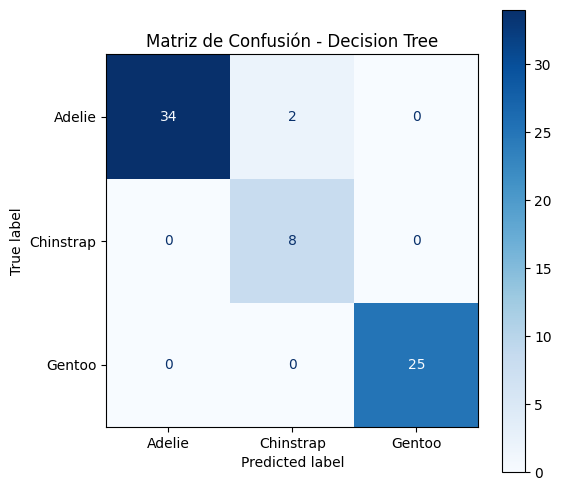

In [70]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_dt.classes_)


fig, ax = plt.subplots(figsize=(6, 6))
disp.plot(ax=ax, cmap='Blues')
plt.title("Matriz de Confusión - Decision Tree")
plt.show()

Este es un resultado muy bueno, indicando que el árbol de decisión aprendió eficazmente las características distintivas de cada especie de pingüino, con muy pocos errores de clasificación.

34 muestras clasificadas correctamente como Adelie  
2 muestras incorrectamente clasificadas como Chinstrap  
8 muestras clasificadas correctamente como Chinstrap  
25 muestras clasificadas correctamente como Gentoo  

In [74]:
#guardar el modelo entrenado
import joblib
from google.colab import drive
drive.mount('/content/drive')

path = "/content/drive/MyDrive/SONDA | Data Science/Machinne Learning/(Core)/Proyecto 2 – Parte I (Core)/selected_dataset/decision_tree_pipeline.pkl"
joblib.dump(best_dt, path )


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


['/content/drive/MyDrive/SONDA | Data Science/Machinne Learning/(Core)/Proyecto 2 – Parte I (Core)/selected_dataset/decision_tree_pipeline.pkl']